# Validation regularization and callbacks

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(np.__version__)
print(tf.__version__)

1.18.1
2.2.0


## Validation sets
### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()
print(diabetes_datasets['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [5]:
# Save the input and target variables
print(diabetes_datasets.keys())

data = diabetes_datasets['data']
target = diabetes_datasets['target']

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [6]:
# Normalize the target data
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a feedforward neural network model

In [8]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [9]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [10]:
# Compo;e the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [11]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [12]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.9336 - mae: 0.7362


[0.9335758686065674, 0.7362247705459595]

### Plot the learning curves

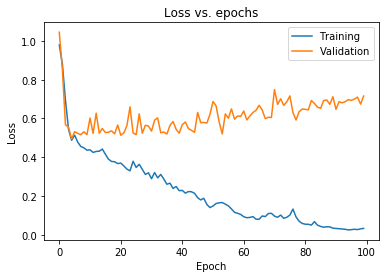

In [15]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Model regularization
### Adding regularization with weight decay and dropout

In [16]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [22]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],), 
                                                   kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [25]:
# Rebuild the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [27]:
# Train the model
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [28]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target)

2/2 [==============================] - 0s 838us/step - loss: 0.5434 - mae: 0.5846


[0.5434192419052124, 0.5845842957496643]

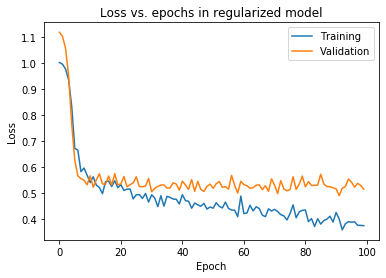

In [30]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs in regularized model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()